In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

In [2]:
df = pd.read_csv("heart_2020_cleaned.csv")

In [3]:
len(df)

159893

In [4]:
df.iloc[1]

HeartDisease                 No
BMI                       20.34
Smoking                      No
AlcoholDrinking              No
Stroke                      Yes
PhysicalHealth              0.0
MentalHealth                0.0
DiffWalking                  No
Sex                      Female
AgeCategory         80 or older
Race                      White
Diabetic                     No
PhysicalActivity            Yes
GenHealth             Very good
SleepTime                   7.0
Asthma                       No
KidneyDisease                No
SkinCancer                   No
Name: 1, dtype: object

In [5]:
df.head(10)

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No
5,Yes,28.87,Yes,No,No,6.0,0.0,Yes,Female,75-79,Black,No,No,Fair,12.0,No,No,No
6,No,21.63,No,No,No,15.0,0.0,No,Female,70-74,White,No,Yes,Fair,4.0,Yes,No,Yes
7,No,31.64,Yes,No,No,5.0,0.0,Yes,Female,80 or older,White,Yes,No,Good,9.0,Yes,No,No
8,No,26.45,No,No,No,0.0,0.0,No,Female,80 or older,White,"No, borderline diabetes",No,Fair,5.0,No,Yes,No
9,No,40.69,No,No,No,0.0,0.0,Yes,Male,65-69,White,No,Yes,Good,10.0,No,No,No


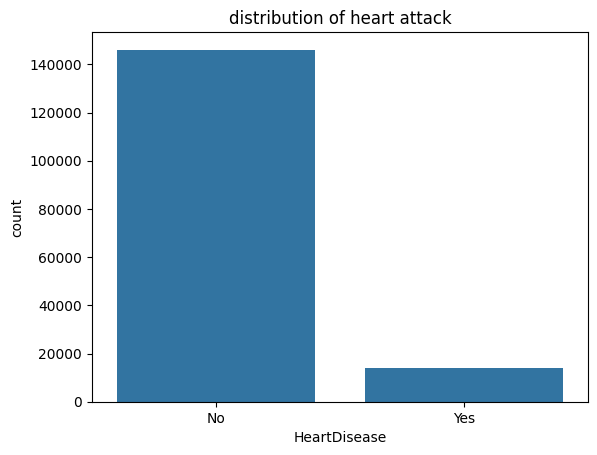

In [6]:
sns.countplot(data = df , x="HeartDisease")
plt.title("distribution of heart attack")
plt.show()

In [7]:
def remove_outliers_from_dataframe(df):
    
    for column in df.columns:
        if column in ['BMI', 'PhysicalHealth', 'MentalHealth', 'SleepTime']:
            Q1 = df[column].quantile(0.25)
            Q3 = df[column].quantile(0.75)
            IQR = Q3 - Q1
        
            lower_bound = Q1 - 1.5 * IQR
            upper_bound = Q3 + 1.5 * IQR
        
            df = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    return df

In [8]:
df=remove_outliers_from_dataframe(df)

In [9]:
bins = [0, 18.5, 24.9, 29.9, 34.9, 39.9, float('inf')]  
labels = ['Underweight', 'Normal weight', 'Overweight', 'Obesity I', 'Obesity II', 'Obesity III'] 

In [10]:
df['BMI_Category'] = pd.cut(df['BMI'], bins=bins, labels=labels, right=False)

/tmp/ipykernel_2231/3202609849.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x='BMI_Category', data=df_heart_disease, palette='Spectral')


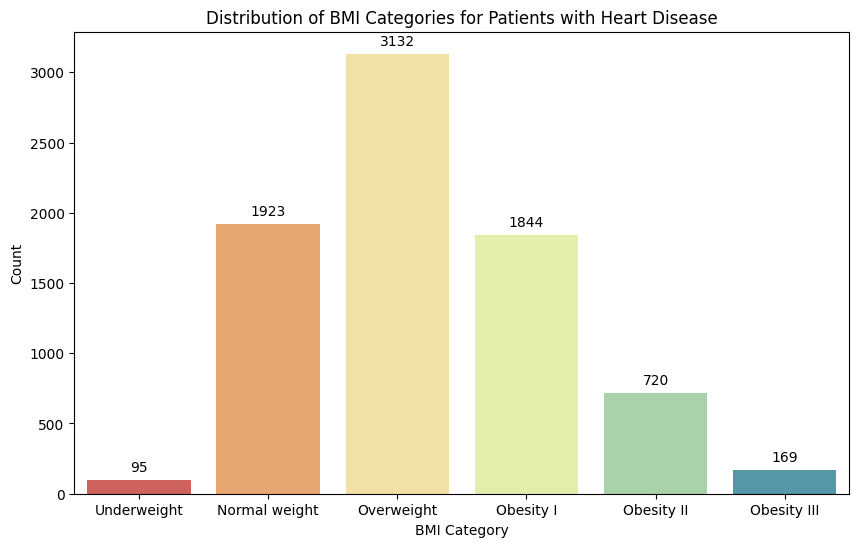

In [11]:
df_heart_disease = df[df['HeartDisease'] == 'Yes']

plt.figure(figsize=(10,6))
ax = sns.countplot(x='BMI_Category', data=df_heart_disease, palette='Spectral')  
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}',  
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', 
                xytext=(0, 9),  
                textcoords='offset points')

plt.title('Distribution of BMI Categories for Patients with Heart Disease')
plt.xlabel('BMI Category')
plt.ylabel('Count')
plt.show()

/tmp/ipykernel_2231/1764042520.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x='AgeCategory', data=df_heart_disease, palette='flare')


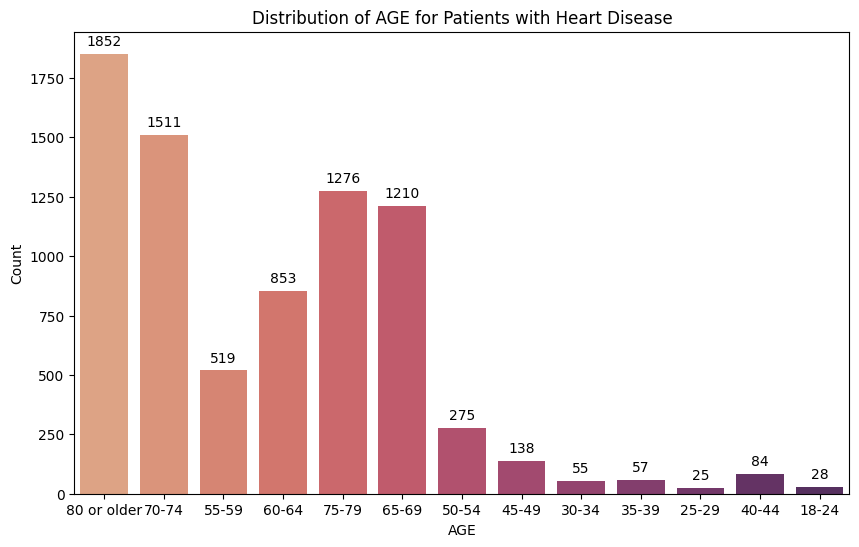

In [12]:
plt.figure(figsize=(10,6))
ax = sns.countplot(x='AgeCategory', data=df_heart_disease, palette='flare')  
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}',  
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', 
                xytext=(0, 9),  
                textcoords='offset points')

plt.title('Distribution of AGE for Patients with Heart Disease')
plt.xlabel('AGE')
plt.ylabel('Count')
plt.show()

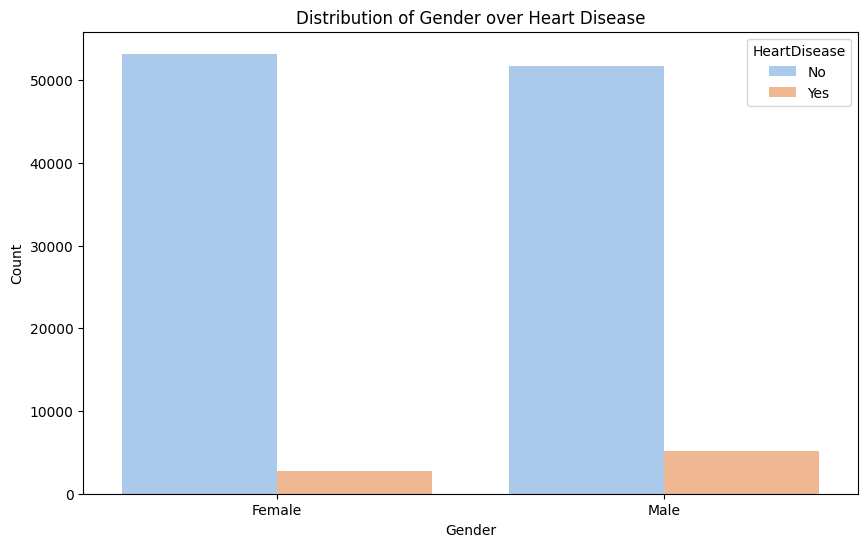

In [13]:
plt.figure(figsize=(10,6))
sns.countplot(x='Sex',hue='HeartDisease',data =df,palette='pastel')
plt.title('Distribution of Gender over Heart Disease')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

/tmp/ipykernel_2231/1995689614.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x='GenHealth', data=df_heart_disease, palette='ch:s=.25,rot=-.25')


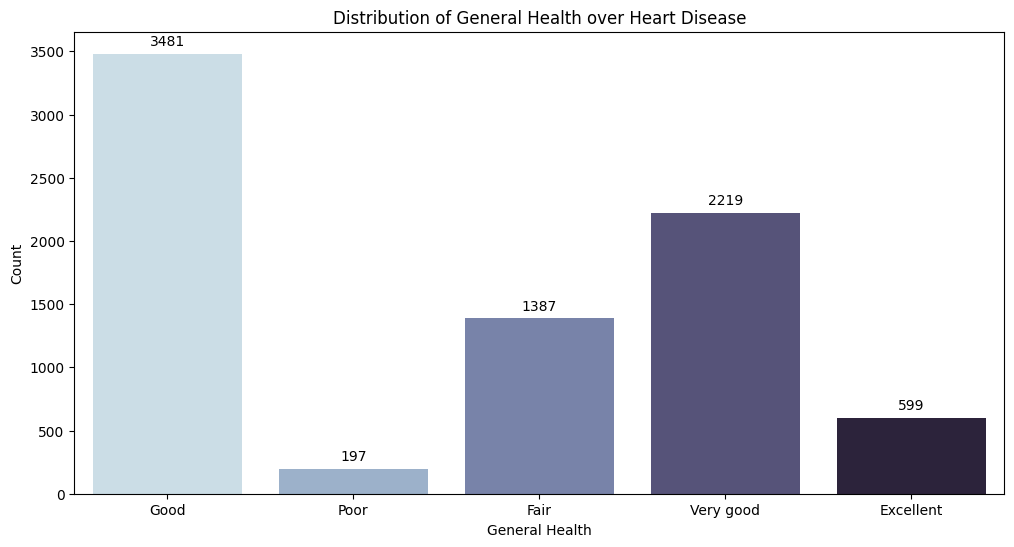

In [14]:
plt.figure(figsize=(12,6))
ax = sns.countplot(x='GenHealth', data=df_heart_disease, palette='ch:s=.25,rot=-.25') 
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}',  
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', 
                xytext=(0, 9),  
                textcoords='offset points')
plt.title('Distribution of General Health over Heart Disease')
plt.xlabel('General Health')
plt.ylabel('Count')
plt.show()

In [15]:
# using binary encoding to encode the heartdisease column because I want to split the dataset into train and test later I will encode the remaining entities
df1 = pd.DataFrame(df)
df1 =pd.get_dummies(df , columns=["HeartDisease" ] , dtype=int)
df1.head(10)

,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer,BMI_Category,HeartDisease_No,HeartDisease_Yes
1,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No,Normal weight,1,0
3,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes,Normal weight,1,0
7,31.64,Yes,No,No,5.0,0.0,Yes,Female,80 or older,White,Yes,No,Good,9.0,Yes,No,No,Obesity I,1,0
8,26.45,No,No,No,0.0,0.0,No,Female,80 or older,White,"No, borderline diabetes",No,Fair,5.0,No,Yes,No,Overweight,1,0
9,40.69,No,No,No,0.0,0.0,Yes,Male,65-69,White,No,Yes,Good,10.0,No,No,No,Obesity III,1,0
11,28.71,Yes,No,No,0.0,0.0,No,Female,55-59,White,No,Yes,Very good,5.0,No,No,No,Overweight,1,0
12,28.37,Yes,No,No,0.0,0.0,Yes,Male,75-79,White,Yes,Yes,Very good,8.0,No,No,No,Overweight,1,0
15,29.18,No,No,No,1.0,0.0,No,Female,50-54,White,No,Yes,Very good,6.0,No,No,No,Overweight,1,0
16,26.26,No,No,No,5.0,2.0,No,Female,70-74,White,No,No,Very good,10.0,No,No,No,Overweight,1,0
18,29.86,Yes,No,No,0.0,0.0,Yes,Female,75-79,Black,Yes,No,Fair,5.0,No,Yes,No,Overweight,1,0


In [16]:
y = df1["HeartDisease_Yes"]

In [17]:
y.head(10)

1     0
3     0
7     0
8     0
9     0
11    0
12    0
15    0
16    0
18    0
Name: HeartDisease_Yes, dtype: int64

In [18]:
df2 = pd.DataFrame(df)

df = pd.get_dummies(df2 , columns=["DiffWalking","Stroke","AlcoholDrinking","Smoking",  "Sex" , "Diabetic" ,"PhysicalActivity" , "Asthma" , "KidneyDisease" , "SkinCancer"] , dtype=int)

In [19]:
df.head(10)

,HeartDisease,BMI,PhysicalHealth,MentalHealth,AgeCategory,Race,GenHealth,SleepTime,BMI_Category,DiffWalking_No,...,Diabetic_Yes,Diabetic_Yes (during pregnancy),PhysicalActivity_No,PhysicalActivity_Yes,Asthma_No,Asthma_Yes,KidneyDisease_No,KidneyDisease_Yes,SkinCancer_No,SkinCancer_Yes
1,No,20.34,0.0,0.0,80 or older,White,Very good,7.0,Normal weight,1,...,0,0,0,1,1,0,1,0,1,0
3,No,24.21,0.0,0.0,75-79,White,Good,6.0,Normal weight,1,...,0,0,1,0,1,0,1,0,0,1
7,No,31.64,5.0,0.0,80 or older,White,Good,9.0,Obesity I,0,...,1,0,1,0,0,1,1,0,1,0
8,No,26.45,0.0,0.0,80 or older,White,Fair,5.0,Overweight,1,...,0,0,1,0,1,0,0,1,1,0
9,No,40.69,0.0,0.0,65-69,White,Good,10.0,Obesity III,0,...,0,0,0,1,1,0,1,0,1,0
11,No,28.71,0.0,0.0,55-59,White,Very good,5.0,Overweight,1,...,0,0,0,1,1,0,1,0,1,0
12,No,28.37,0.0,0.0,75-79,White,Very good,8.0,Overweight,0,...,1,0,0,1,1,0,1,0,1,0
15,No,29.18,1.0,0.0,50-54,White,Very good,6.0,Overweight,1,...,0,0,0,1,1,0,1,0,1,0
16,No,26.26,5.0,2.0,70-74,White,Very good,10.0,Overweight,1,...,0,0,1,0,1,0,1,0,1,0
18,No,29.86,0.0,0.0,75-79,Black,Fair,5.0,Overweight,0,...,1,0,1,0,1,0,0,1,1,0


In [20]:
df = pd.DataFrame(df)

df["AgeCategory_encoded"] = df["AgeCategory"].astype("category").cat.codes
df["Race_encoded"] = df["Race"].astype("category").cat.codes
df["GenHealth_encoded"] = df["GenHealth"].astype("category").cat.codes
df["BMI_Category_encoded"] = df["BMI_Category"].astype("category").cat.codes

In [21]:
df.head(10)

,HeartDisease,BMI,PhysicalHealth,MentalHealth,AgeCategory,Race,GenHealth,SleepTime,BMI_Category,DiffWalking_No,...,Asthma_No,Asthma_Yes,KidneyDisease_No,KidneyDisease_Yes,SkinCancer_No,SkinCancer_Yes,AgeCategory_encoded,Race_encoded,GenHealth_encoded,BMI_Category_encoded
1,No,20.34,0.0,0.0,80 or older,White,Very good,7.0,Normal weight,1,...,1,0,1,0,1,0,12,5,4,1
3,No,24.21,0.0,0.0,75-79,White,Good,6.0,Normal weight,1,...,1,0,1,0,0,1,11,5,2,1
7,No,31.64,5.0,0.0,80 or older,White,Good,9.0,Obesity I,0,...,0,1,1,0,1,0,12,5,2,3
8,No,26.45,0.0,0.0,80 or older,White,Fair,5.0,Overweight,1,...,1,0,0,1,1,0,12,5,1,2
9,No,40.69,0.0,0.0,65-69,White,Good,10.0,Obesity III,0,...,1,0,1,0,1,0,9,5,2,5
11,No,28.71,0.0,0.0,55-59,White,Very good,5.0,Overweight,1,...,1,0,1,0,1,0,7,5,4,2
12,No,28.37,0.0,0.0,75-79,White,Very good,8.0,Overweight,0,...,1,0,1,0,1,0,11,5,4,2
15,No,29.18,1.0,0.0,50-54,White,Very good,6.0,Overweight,1,...,1,0,1,0,1,0,6,5,4,2
16,No,26.26,5.0,2.0,70-74,White,Very good,10.0,Overweight,1,...,1,0,1,0,1,0,10,5,4,2
18,No,29.86,0.0,0.0,75-79,Black,Fair,5.0,Overweight,0,...,1,0,0,1,1,0,11,2,1,2


In [22]:
 df.drop(columns = ["AgeCategory" , "Race" , "GenHealth" , "BMI_Category" , "HeartDisease"] , inplace = True)

In [23]:
df.head(10)

,BMI,PhysicalHealth,MentalHealth,SleepTime,DiffWalking_No,DiffWalking_Yes,Stroke_No,Stroke_Yes,AlcoholDrinking_No,AlcoholDrinking_Yes,...,Asthma_No,Asthma_Yes,KidneyDisease_No,KidneyDisease_Yes,SkinCancer_No,SkinCancer_Yes,AgeCategory_encoded,Race_encoded,GenHealth_encoded,BMI_Category_encoded
1,20.34,0.0,0.0,7.0,1,0,0,1,1,0,...,1,0,1,0,1,0,12,5,4,1
3,24.21,0.0,0.0,6.0,1,0,1,0,1,0,...,1,0,1,0,0,1,11,5,2,1
7,31.64,5.0,0.0,9.0,0,1,1,0,1,0,...,0,1,1,0,1,0,12,5,2,3
8,26.45,0.0,0.0,5.0,1,0,1,0,1,0,...,1,0,0,1,1,0,12,5,1,2
9,40.69,0.0,0.0,10.0,0,1,1,0,1,0,...,1,0,1,0,1,0,9,5,2,5
11,28.71,0.0,0.0,5.0,1,0,1,0,1,0,...,1,0,1,0,1,0,7,5,4,2
12,28.37,0.0,0.0,8.0,0,1,1,0,1,0,...,1,0,1,0,1,0,11,5,4,2
15,29.18,1.0,0.0,6.0,1,0,1,0,1,0,...,1,0,1,0,1,0,6,5,4,2
16,26.26,5.0,2.0,10.0,1,0,1,0,1,0,...,1,0,1,0,1,0,10,5,4,2
18,29.86,0.0,0.0,5.0,0,1,1,0,1,0,...,1,0,0,1,1,0,11,2,1,2


In [24]:
# the dataset is highly imbalanced hence we can either reduce the coourances of "no" or use sampling techniques to incease the number of occuranes of "YEs"

In [25]:
from sklearn.model_selection import StratifiedKFold

skfold = StratifiedKFold(n_splits = 3)

for fold, (train_index, test_index) in enumerate(skfold.split(df, y)):
    X_train, X_test = df.iloc[train_index], df.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

In [26]:
# the functionality of the above code is it splits the train set (df) and test set (y) using stratified k fold technique 
# i have used sk fold because since the dataset is highly imbalances I want the train set and the test set to maintain equal propotion of classes 

In [27]:
# running the label encoding to encode the remanining features so that I can train the model with ease later

In [28]:
#finally running the models to check for the best performing model
# 1.) logistic regression 

result = {}

In [29]:
def evaluate_classification_model(name,y_true, y_pred):
    if np.issubdtype(y_pred.dtype, np.floating):
        y_pred = (y_pred > 0.5).astype(int)
    
    if not np.array_equal(np.unique(y_true), [0, 1]) or not np.array_equal(np.unique(y_pred), [0, 1]):
        raise ValueError("Both y_true and y_pred must contain binary values (0 or 1).")

    accuracy = accuracy_score(y_true, y_pred)
    result[name] = accuracy
    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)

    print("Model Evaluation Metrics:")
    print(f"Accuracy: {accuracy:.2f}")
    print(f"Precision: {precision:.2f}")
    print(f"Recall: {recall:.2f}")
    print(f"F1 Score: {f1:.2f}")
    print("\nClassification Report:")
    print(classification_report(y_true, y_pred))

    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.show()

In [30]:
result = {}

In [31]:
from sklearn.linear_model import LinearRegression

Lr = LinearRegression()
Lr.fit(X_train , y_train)

LinearRegression()

In [32]:
y_pred = Lr.predict(X_test)

Model Evaluation Metrics:
Accuracy: 0.93
Precision: 0.75
Recall: 0.00
F1 Score: 0.01

Classification Report:
              precision    recall  f1-score   support

           0       0.93      1.00      0.96     34947
           1       0.75      0.00      0.01      2628

    accuracy                           0.93     37575
   macro avg       0.84      0.50      0.49     37575
weighted avg       0.92      0.93      0.90     37575



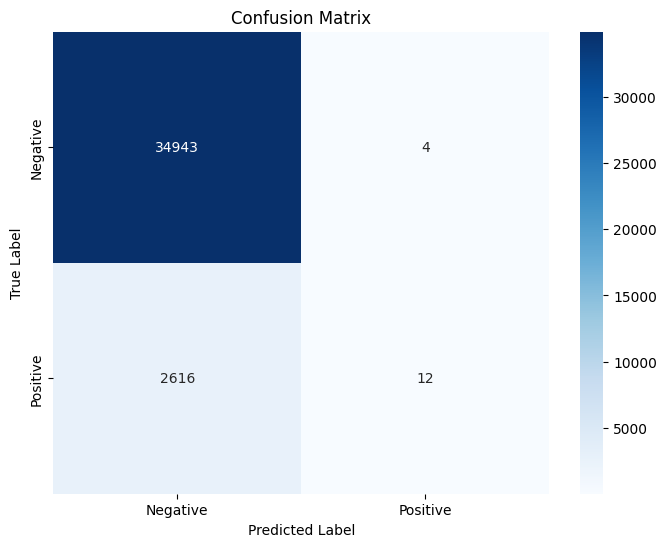

In [33]:
evaluate_classification_model("linear_regression",y_test , y_pred)

In [34]:
from xgboost import XGBClassifier

xgb = XGBClassifier(  eval_metric= 'logloss')

xgb.fit(X_train , y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, random_state=None, ...)

Model Evaluation Metrics:
Accuracy: 0.93
Precision: 0.39
Recall: 0.06
F1 Score: 0.10

Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.99      0.96     34947
           1       0.39      0.06      0.10      2628

    accuracy                           0.93     37575
   macro avg       0.66      0.53      0.53     37575
weighted avg       0.90      0.93      0.90     37575



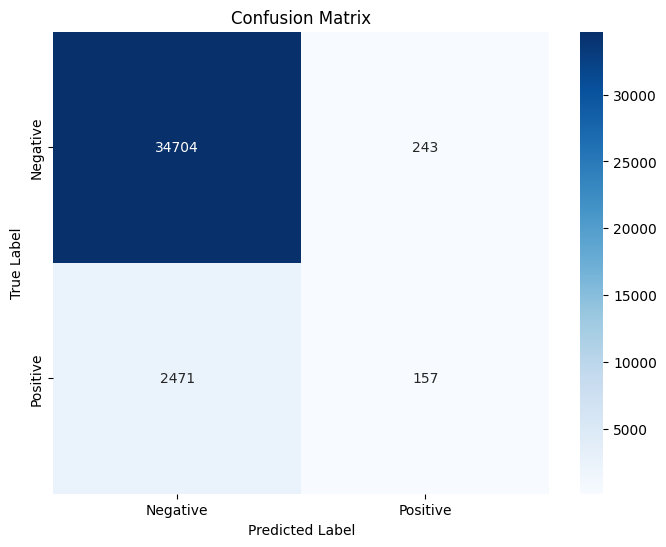

In [35]:
y_pred = xgb.predict(X_test)
evaluate_classification_model("xgboost",y_test , y_pred)

In [36]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=100, random_state=42)
rfc.fit(X_train , y_train)

RandomForestClassifier(random_state=42)

Model Evaluation Metrics:
Accuracy: 0.92
Precision: 0.27
Recall: 0.08
F1 Score: 0.12

Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.98      0.96     34947
           1       0.27      0.08      0.12      2628

    accuracy                           0.92     37575
   macro avg       0.60      0.53      0.54     37575
weighted avg       0.89      0.92      0.90     37575



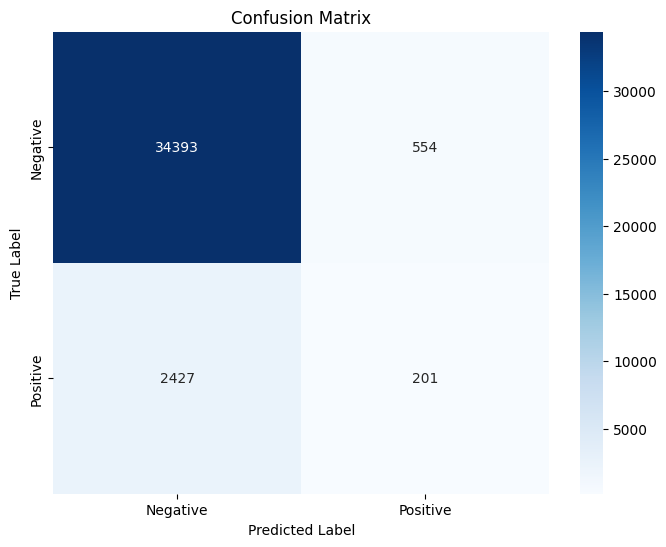

In [37]:
y_pred = rfc.predict(X_test)
evaluate_classification_model("random_forest",y_test , y_pred)

In [38]:
from sklearn.ensemble import GradientBoostingClassifier

gbc = GradientBoostingClassifier(n_estimators=100, random_state=42)

gbc.fit(X_train , y_train)

GradientBoostingClassifier(random_state=42)

Model Evaluation Metrics:
Accuracy: 0.93
Precision: 0.49
Recall: 0.05
F1 Score: 0.09

Classification Report:
              precision    recall  f1-score   support

           0       0.93      1.00      0.96     34947
           1       0.49      0.05      0.09      2628

    accuracy                           0.93     37575
   macro avg       0.71      0.52      0.52     37575
weighted avg       0.90      0.93      0.90     37575



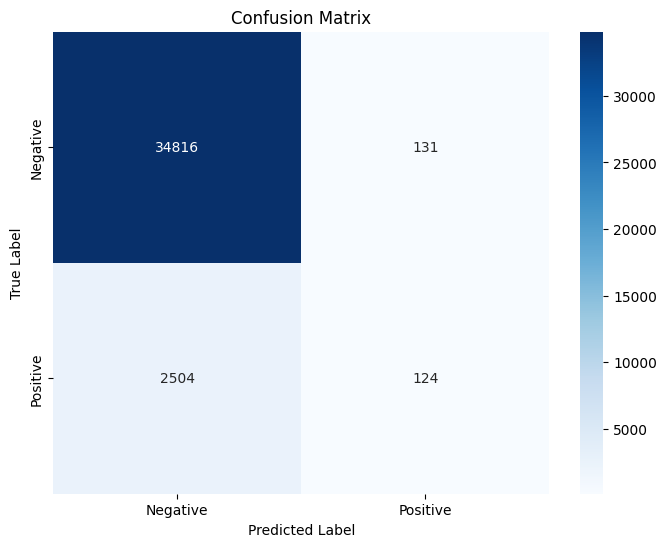

In [39]:
y_pred = gbc.predict(X_test)
evaluate_classification_model("gradient_boost",y_test , y_pred)

In [40]:
result

{'linear_regression': 0.9302727877578177,
 'xgboost': 0.927771124417831,
 'random_forest': 0.9206653359946773,
 'gradient_boost': 0.9298735861610113}

In [41]:
max_key = max(result , key = result.get)
max_acc = result[max_key]
max_key , max_acc

('linear_regression', 0.9302727877578177)